In [2]:
import pandas as pd

In [84]:
df = pd.read_excel("../Data/topics_media-per copia.xlsx")

# Eliminar las columnas que terminan en '1'
df = df[[col for col in df.columns if not col.endswith('1')]]

# Eliminar las filas 82 y 83 (índice 81 y 82 en Python)
df = df.drop([0,82])

# Añadir columnas con la desviación típica de cada fila para cada columna
for column in df.columns:
    if column != "Topic":
        df[column + '_STD'] = pd.to_numeric(df[[col for col in df.columns if col != column]].std(axis=1))

display(df)

,Topic,20MIN,ABC,EL PAÍS,EL MUNDO,LA VANGUARDIA,20MIN_STD,ABC_STD,EL PAÍS_STD,EL MUNDO_STD,LA VANGUARDIA_STD
1,0,3.678710,3.591333,3.892579,3.361530,3.270125,1.596371,1.524731,1.408359,1.423651,1.377279
2,1,2.993581,3.471906,2.692665,3.126558,2.583190,0.949104,0.987832,1.133954,1.058847,1.097110
3,2,3.304255,2.616015,3.035497,2.630979,2.298490,0.389444,1.038839,1.006186,1.051202,1.052435
4,3,2.219982,1.923624,2.466490,2.618875,2.572742,0.387756,0.928366,0.957047,0.936358,0.928213
5,4,1.816723,1.822680,2.090327,1.899005,2.340281,0.899878,1.019371,1.029328,1.012966,0.969957
...,...,...,...,...,...,...,...,...,...,...,...
77,76,0.146079,0.095257,0.102374,0.126031,0.135820,33.936866,31.287956,28.974601,27.004817,25.332352
78,77,0.115217,0.118005,0.099993,0.112502,0.161939,34.380398,31.702542,29.356042,27.359059,25.668861
79,78,0.117274,0.106631,0.076185,0.130303,0.125372,34.833642,32.120410,29.742221,27.723886,26.005591
80,79,0.117274,0.049761,0.138085,0.128167,0.112313,35.282002,32.527597,30.132441,28.081077,26.339532


In [12]:
df = pd.read_excel("../Data/topics_media-per copia.xlsx")

# Eliminar las columnas que terminan en '1'
df = df[[col for col in df.columns if not col.endswith('1')]]

# Eliminar las filas 82 y 83 (índice 81 y 82 en Python)
df = df.drop([0,82,83])

# Suponiendo que la columna 'Topic' es la primera columna
topic_column = df.iloc[:, 0]
df = df.iloc[:, 1:]  # Eliminar la columna 'Topic' de los cálculos

df['Mean'] = df.mean(axis=1)

df

,20MIN,ABC,EL PAÍS,EL MUNDO,LA VANGUARDIA,Mean
1,3.678710,3.591333,3.892579,3.361530,3.270125,3.558855
2,2.993581,3.471906,2.692665,3.126558,2.583190,2.973580
3,3.304255,2.616015,3.035497,2.630979,2.298490,2.777047
4,2.219982,1.923624,2.466490,2.618875,2.572742,2.360343
5,1.816723,1.822680,2.090327,1.899005,2.340281,1.993803
...,...,...,...,...,...,...
77,0.146079,0.095257,0.102374,0.126031,0.135820,0.121112
78,0.115217,0.118005,0.099993,0.112502,0.161939,0.121531
79,0.117274,0.106631,0.076185,0.130303,0.125372,0.111153
80,0.117274,0.049761,0.138085,0.128167,0.112313,0.109120


In [3]:
df = pd.read_excel("../Data/topics_media-per copia.xlsx")

# Eliminar las columnas que terminan en '1'
df = df[[col for col in df.columns if not col.endswith('1')]]

# Eliminar las filas 82 y 83 (índice 81 y 82 en Python)
df = df.drop([0,82,83])

# Suponiendo que la columna 'Topic' es la primera columna
topic_column = df.iloc[:, 0]
df = df.iloc[:, 1:]  # Eliminar la columna 'Topic' de los cálculos

df['Mean'] = df.mean(axis=1)

# Restar la media de cada elemento de la fila y mantener el valor absoluto
df= df.iloc[:, :-1].sub(df['Mean'], axis=0).abs()

# Volver a agregar la columna 'Topic' al DataFrame resultante
df.insert(0, 'Topic', topic_column)

df

,Topic,20MIN,ABC,EL PAÍS,EL MUNDO,LA VANGUARDIA
1,Vaccination,0.119854,0.032478,0.333724,0.197325,0.288730
2,Conversation expressions,0.020001,0.498326,0.280915,0.152978,0.390390
3,Gender and feminism,0.527208,0.161033,0.258450,0.146068,0.478557
4,Madrid,0.140361,0.436719,0.106148,0.258532,0.212399
5,Spanish politics,0.177080,0.171123,0.096524,0.094798,0.346478
...,...,...,...,...,...,...
77,Cycling and motorcycling,0.024967,0.025855,0.018738,0.004919,0.014708
78,Independentism,0.006314,0.003526,0.021538,0.009029,0.040408
79,Currency,0.006121,0.004522,0.034968,0.019150,0.014219
80,Internet slang,0.008154,0.059359,0.028965,0.019047,0.003193


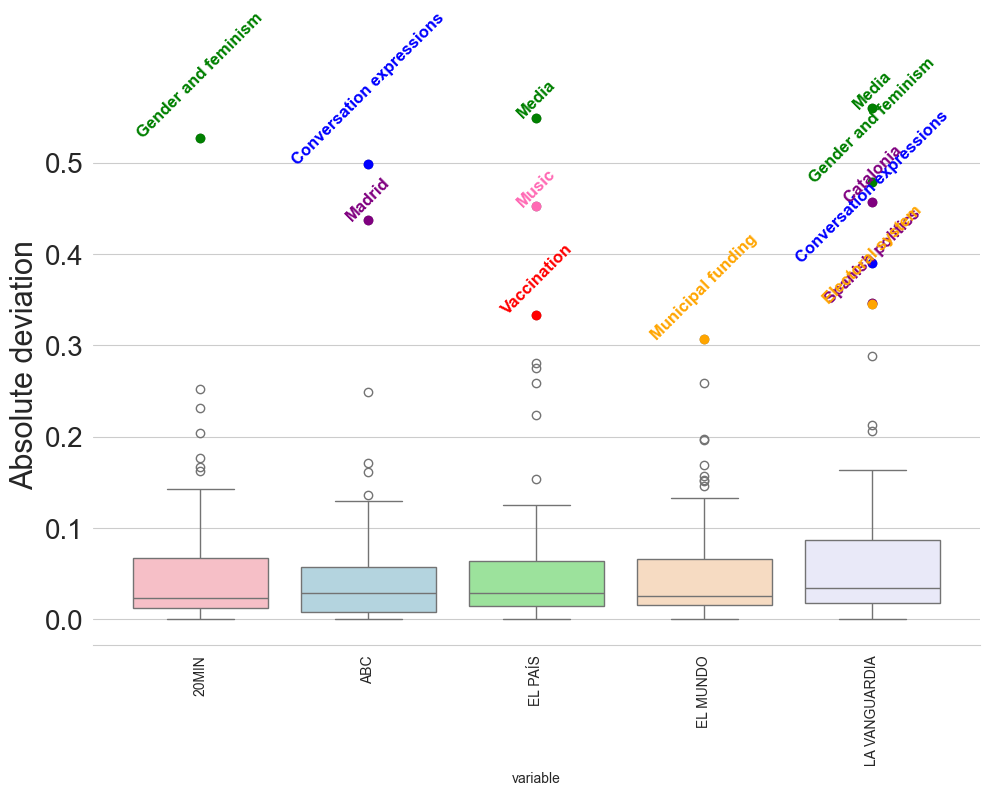

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Suponiendo que df ya ha sido cargado y contiene la columna 'Topic'
# Seleccionar solo las columnas de desviación estándar (excluyendo 'Topic')
std_columns = [col for col in df.columns if col != 'Topic']

# Unir las columnas en un DataFrame largo para seaborn
df_long_std = pd.melt(df, id_vars=['Topic'], value_vars=std_columns)

# Definir una paleta de colores pastel personalizada
pastel_colors = ["#FFB6C1", "#ADD8E6", "#90EE90", "#FFDAB9", "#E6E6FA"]  # Rosa, Azul claro, Verde claro, Melocotón claro, Lavanda

# Crear el boxplot solo con las columnas de desviación estándar
plt.figure(figsize=(10, 8))
plt.xlabel('')
plt.ylabel('Absolute deviation', fontsize=22)

ax = sns.boxplot(x='variable', y='value', hue='variable', palette=pastel_colors, data=df_long_std, dodge=False, legend=False)

sns.despine(top=True, right=True, left=True, bottom=False)

# Añadir etiquetas y colores a los outliers que están por encima de 0.4
outliers = df_long_std[df_long_std['value'] > 0.3]
color_map = {
    'Madrid': 'purple',
    'Spanish politics': 'purple',
    'Catalonia': 'purple',
    'Music': '#FF69B4',
    'Municipal funding': 'orange',
    'Electoral system': 'orange',
    'Vaccination':'red',
    'Conversation expressions': 'blue'
}

for line in range(0, outliers.shape[0]):
    topic = outliers.Topic.iloc[line]
    color = color_map.get(topic, 'green')  # Default to green if the topic is not in the color_map
    ax.text(
        outliers.variable.iloc[line],
        outliers.value.iloc[line],
        topic,
        horizontalalignment='center',
        size='large',
        color=color,
        weight='semibold',
        rotation=45
    )
    ax.plot(outliers.variable.iloc[line], outliers.value.iloc[line], 'o', color=color)

plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.savefig('boxplot_std.pdf', format='pdf')
plt.savefig('boxplot_std2.svg', format='svg')

plt.show()


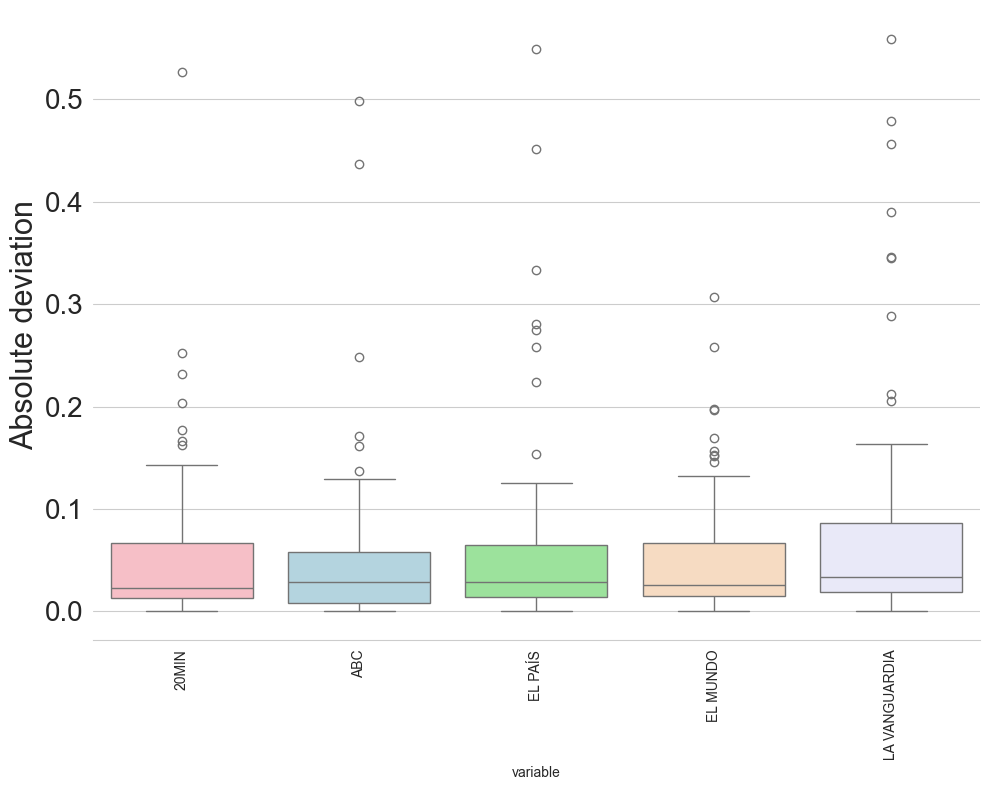

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Suponiendo que df ya ha sido cargado y contiene la columna 'Topic'
# Seleccionar solo las columnas de desviación estándar (excluyendo 'Topic')
std_columns = [col for col in df.columns if col != 'Topic']

# Unir las columnas en un DataFrame largo para seaborn
df_long_std = pd.melt(df, id_vars=['Topic'], value_vars=std_columns)

# Definir una paleta de colores pastel personalizada
pastel_colors = ["#FFB6C1", "#ADD8E6", "#90EE90", "#FFDAB9", "#E6E6FA"]  # Rosa, Azul claro, Verde claro, Melocotón claro, Lavanda

# Crear el boxplot solo con las columnas de desviación estándar
plt.figure(figsize=(10, 8))
plt.xlabel('')
plt.ylabel('Absolute deviation', fontsize=22)

ax = sns.boxplot(x='variable', y='value', hue='variable', palette=pastel_colors, data=df_long_std, dodge=False, legend=False)

sns.despine(top=True, right=True, left=True, bottom=False)

#plt.title('Boxplots of Standard Deviations')
plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.savefig('boxplot_std.pdf', format='pdf')
plt.savefig('boxplot_std2.svg', format='svg')

plt.show()


In [18]:
# Mostrar las estadísticas del boxplot
print("Estadísticas del Boxplot:")
print(df.describe())

Estadísticas del Boxplot:
           20MIN        ABC    EL PAÍS   EL MUNDO  LA VANGUARDIA
count  81.000000  81.000000  81.000000  81.000000      81.000000
mean    0.055468   0.050880   0.064011   0.051682       0.079195
std     0.077329   0.079830   0.096859   0.059670       0.114418
min     0.000013   0.000384   0.000065   0.000440       0.000173
25%     0.012638   0.008516   0.014297   0.015300       0.018526
50%     0.023227   0.028911   0.028635   0.025809       0.033927
75%     0.067212   0.057539   0.064437   0.066541       0.086630
max     0.527208   0.498326   0.549194   0.307060       0.559444


In [87]:
# Calcular la media y desviación típica por tópico
df['Mean'] = df.mean(axis=1)
df['STD'] = df.std(axis=1)

# Seleccionar solo las columnas de desviación estándar calculadas para cada tópico
std_columns = ['20MIN_STD', 'ABC_STD', 'EL PAÍS_STD', 'EL MUNDO_STD', 'LA VANGUARDIA_STD']

# Crear el DataFrame largo para seaborn
df_long_std = pd.melt(df, id_vars=['Topic'], value_vars=std_columns)

# Calcular estadísticas descriptivas de las desviaciones típicas
descriptive_stats = df_long_std.groupby('variable')['value'].describe()

descriptive_stats

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
20MIN_STD,81.0,17.701225,10.638011,0.387756,8.660941,17.751935,26.752160,35.726086
ABC_STD,81.0,16.316934,9.793003,0.928366,7.931661,16.348708,24.658893,32.942325
EL MUNDO_STD,81.0,14.072088,8.448229,0.936358,6.796610,14.081849,21.275150,28.433375
EL PAÍS_STD,81.0,15.102680,9.068628,0.957047,7.303681,15.121513,22.833056,30.510166
LA VANGUARDIA_STD,81.0,13.199777,7.920482,0.928213,6.361593,13.203078,19.958402,26.674728


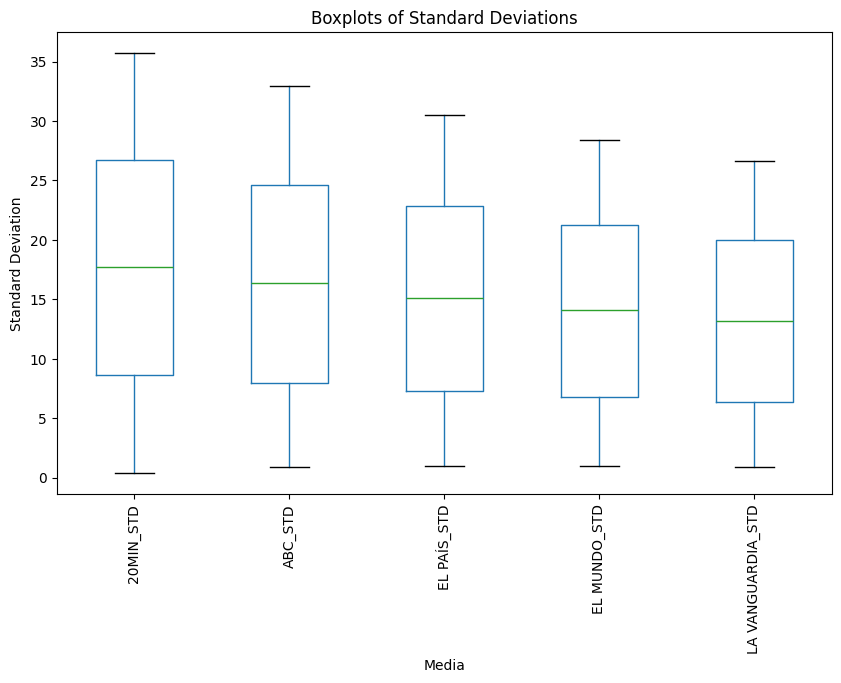

In [62]:

# Crear el boxplot utilizando pandas
plt.figure(figsize=(10, 6))
df_std.boxplot(grid=False)
plt.title('Boxplots of Standard Deviations')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Media')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90)
plt.show() 

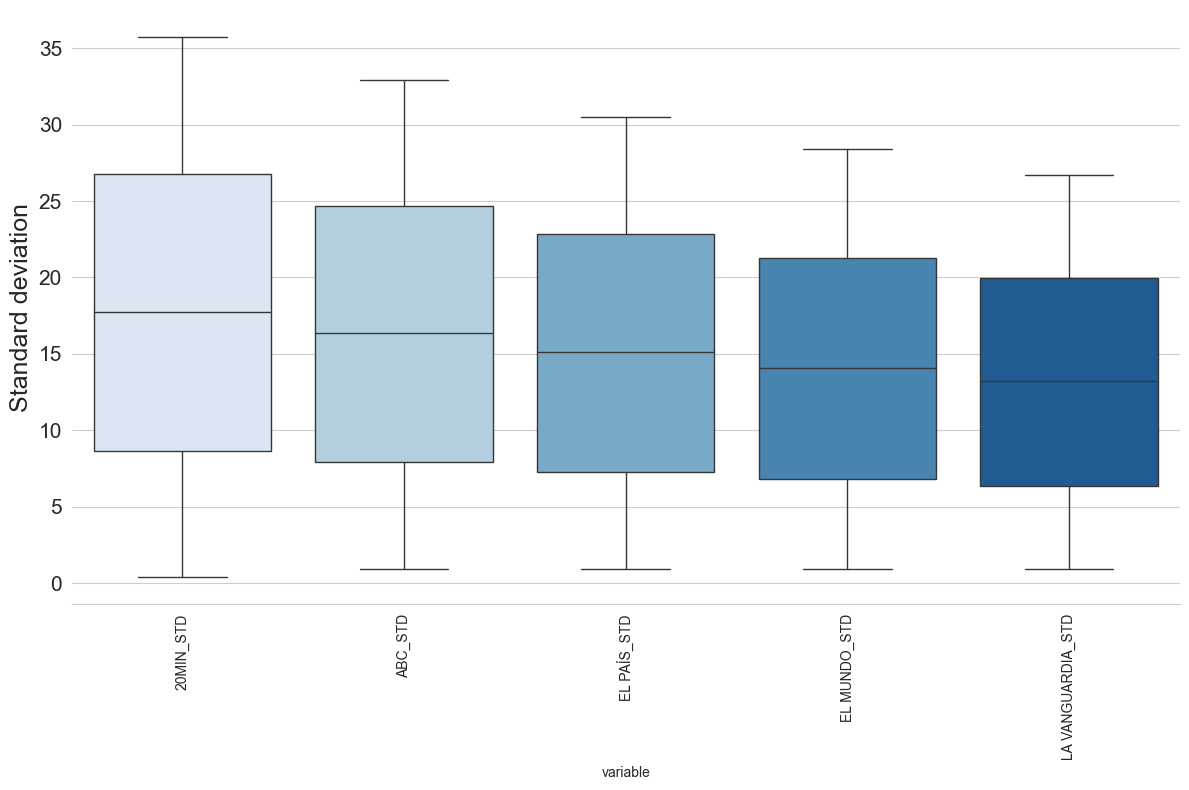

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Seleccionar solo las columnas de desviación estándar
std_columns = [col for col in df.columns if col.endswith('_STD')]

# Unir las columnas en un DataFrame largo para seaborn
df_long_std = pd.melt(df, id_vars=['Topic'], value_vars=std_columns)

palette = "Blues"


# Crear el boxplot solo con las columnas de desviación estándar
plt.figure(figsize=(12, 8))
plt.xlabel('')
plt.ylabel('Standard deviation',fontsize=18)

ax=sns.boxplot(x='variable', y='value',hue='variable', palette=palette, data=df_long_std)

sns.despine(top=True, right=True, left=True, bottom=False)

#plt.title('Boxplots of Standard Deviations')
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.savefig('boxplot_std.pdf', format='pdf')
plt.savefig('boxplot_std.svg', format='svg')

plt.show()

In [86]:
# Mostrar las estadísticas del boxplot
print("Estadísticas del Boxplot:")
print(df_std.describe())

Estadísticas del Boxplot:
       20MIN_STD    ABC_STD  EL PAÍS_STD  EL MUNDO_STD  LA VANGUARDIA_STD
count  81.000000  81.000000    81.000000     81.000000          81.000000
mean   17.701225  16.316934    15.102680     14.072088          13.199777
std    10.638011   9.793003     9.068628      8.448229           7.920482
min     0.387756   0.928366     0.957047      0.936358           0.928213
25%     8.660941   7.931661     7.303681      6.796610           6.361593
50%    17.751935  16.348708    15.121513     14.081849          13.203078
75%    26.752160  24.658893    22.833056     21.275150          19.958402
max    35.726086  32.942325    30.510166     28.433375          26.674728


In [23]:
df = pd.read_excel("../Human-in-the-loop-topic-labeling.xlsx")
display(df)

,Topic,Count,Name,Representation,Llama2,Zephyr,ChatGPT4o,ChatGPT3-5,Human-Tag,Type,KeyBERT,MMR,Representative_Docs
0,-1,179747,-1_si_ser_españa_gobierno,"['si', 'ser', 'españa', 'gobierno', 'ahora', '...",Spanish government decisions during COVID-19 p...,"['\n""Spain\'s current situation regarding COVI...",NaN,NaN,Outliers,Outliers,"['además', 'aunque', 'mas', 'dar', 'pues', 'cr...","['si', 'ser', 'españa', 'gobierno', 'ahora', '...",['izó este fin de semana que el confinamiento ...
1,0,11922,0_vacunas_vacuna_dosis_vacunación,"['vacunas', 'vacuna', 'dosis', 'vacunación', '...",Vaccines and their distribution in Spain,"['\n""COVID Vaccine Distribution and Administra...",COVID-19 Vaccination Strategy and Challenges i...,COVID-19 vaccination rollout and controversies,NaN,NaN,"['vacunaciones', 'vacunados', 'vacunar', 'vacu...","['vacunas', 'vacuna', 'dosis', 'vacunación', '...",[' vaya el precio de la vacuna de az es tan b...
2,1,10408,1_si_vaya_pues_españa,"['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...","['Spanish culture and language', '', '', '', '...","['\n""Spain\'s Quirky Expressions""', '', '', ''...",Casual commentary on Spain,Spanish sentiments or reactions,NaN,NaN,"['pasa', 'vas', 'vale', 'pala', 'hace', 'si', ...","['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...","['españa', 'vaya país vaya tela', 'pues como l..."
3,2,9296,2_mujer_mujeres_madre_hijos,"['mujer', 'mujeres', 'madre', 'hijos', 'niños'...",['Gender-based violence and discrimination aga...,"['\n""Gender and Family Relationships""', '', ''...",Gender equality and violence debates,Gender equality and perceptions in society,NaN,NaN,"['feminista', 'mujer', 'feminismo', 'mujeres',...","['mujer', 'mujeres', 'madre', 'hijos', 'niños'...","['la madre que lo', 'va a ser bastante diverti..."
4,3,8131,3_madrid_barcelona_club_madrileños,"['madrid', 'barcelona', 'club', 'madrileños', ...","['Madrid vs Barcelona football rivalry', '', '...","['\n""Madrid Politics and Football""', '', '', '...",Madrid vs Barcelona football rivalry,Public sentiment regarding actions in Madrid,NaN,NaN,"['madrid', 'madrileña', 'madrileño', 'madrileñ...","['madrid', 'barcelona', 'club', 'madrileños', ...","['esto lo están haciendo en todo madrid', ' el..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,76,410,76_ciclistas_ciclista_bici_bicicleta,"['ciclistas', 'ciclista', 'bici', 'bicicleta',...","['Cycling safety concerns in Madrid, Spain', '...","['\n""Cyclist Safety Concerns""', '', '', '', ''...",Cyclists and road safety issues,Cyclist safety on roads,NaN,NaN,"['ciclismo', 'bicicletas', 'bici', 'bicicleta'...","['ciclistas', 'ciclista', 'bici', 'bicicleta',...",['la culpa es del ciclista por ir en bici no s...
78,77,401,77_independencia_independentismo_independentis...,"['independencia', 'independentismo', 'independ...","['Why there will never be independence', '', '...","['\n""Catalan Independence Debate""', '', '', ''...",Catalan independence movement,Independence movements,NaN,NaN,"['independencia', 'independentista', 'independ...","['independencia', 'independentismo', 'independ...","['el independentismo', ' ʖ para cuando la ind..."
79,78,395,78_euros_euro_millones_mil,"['euros', 'euro', 'millones', 'mil', 'mes', 'b...","['Euros and money', '', '', '', '', '', '', ''...","['\n""Euro Currency""', '', '', '', '', '', '', ...",Euro currency and financial discussions,Financial matters,NaN,NaN,"['euros', 'euro', 'eur', 'europea', 'europeo',...","['euros', 'euro', 'millones', 'mil', 'mes', 'b...","['si son sólo unos euros', ' euros', 'a euros ..."
80,79,373,79_xd_xdxd_xdd_coherencia,"['xd', 'xdxd', 'xdd', 'coherencia', 'estoxd', ...","['Unclear topic', '', '', '', '', '', '', '', ...","['\n""XD Coherence Catalunya""', '', '', '', '',...",Informal online communication,Internet culture,NaN,NaN,"['xd', 'xdxd', 'xdd', 'xq', 'compásxd', 'oms',...","['xd', 'xdxd', 'xdd', 'coherencia', 'estoxd', ...","['de nada más xd', 'para esto xd ', ' xd xd ']"


In [25]:
import pandas as pd
import ast

# Función para extraer el primer elemento de una lista representada como string
# Función para extraer el primer elemento de una lista representada como string
def extract_first_element(string):
    if isinstance(string, str):
        # Eliminar los corchetes y dividir por comas
        elements = string.strip('[]').split(',')
        if elements:
            # Retornar el primer elemento, quitando posibles espacios y comillas
            return elements[0].strip(" '")
    return string


# Aplicar la función a la columna del DataFrame
df['Llama2'] = df['Llama2'].apply(extract_first_element)
df['Zephyr'] = df['Zephyr'].apply(extract_first_element)

# Función para limpiar los caracteres específicos
def clean_string(s):
    if isinstance(s, str):
        # Reemplazar los caracteres específicos
        s = s.replace('\n', '').replace('\\', ' ').replace('"', '')
        s = s[1:] if s else s
    return s

# Aplicar la función a la columna 'Zephyr'
df['Zephyr'] = df['Zephyr'].apply(clean_string)

# Mostrar el DataFrame resultante
display(df)

,Topic,Count,Name,Representation,Llama2,Zephyr,ChatGPT4o,ChatGPT3-5,Human-Tag,Type,KeyBERT,MMR,Representative_Docs
0,-1,179747,-1_si_ser_españa_gobierno,"['si', 'ser', 'españa', 'gobierno', 'ahora', '...",Spanish government decisions during COVID-19 p...,Spain 's current situation regarding COVID-19 ...,NaN,NaN,Outliers,Outliers,"['además', 'aunque', 'mas', 'dar', 'pues', 'cr...","['si', 'ser', 'españa', 'gobierno', 'ahora', '...",['izó este fin de semana que el confinamiento ...
1,0,11922,0_vacunas_vacuna_dosis_vacunación,"['vacunas', 'vacuna', 'dosis', 'vacunación', '...",Vaccines and their distribution in Spain,COVID Vaccine Distribution and Administration,COVID-19 Vaccination Strategy and Challenges i...,COVID-19 vaccination rollout and controversies,NaN,NaN,"['vacunaciones', 'vacunados', 'vacunar', 'vacu...","['vacunas', 'vacuna', 'dosis', 'vacunación', '...",[' vaya el precio de la vacuna de az es tan b...
2,1,10408,1_si_vaya_pues_españa,"['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...",Spanish culture and language,Spain 's Quirky Expressions,Casual commentary on Spain,Spanish sentiments or reactions,NaN,NaN,"['pasa', 'vas', 'vale', 'pala', 'hace', 'si', ...","['si', 'vaya', 'pues', 'españa', 'va', 'pi', '...","['españa', 'vaya país vaya tela', 'pues como l..."
3,2,9296,2_mujer_mujeres_madre_hijos,"['mujer', 'mujeres', 'madre', 'hijos', 'niños'...",Gender-based violence and discrimination again...,Gender and Family Relationships,Gender equality and violence debates,Gender equality and perceptions in society,NaN,NaN,"['feminista', 'mujer', 'feminismo', 'mujeres',...","['mujer', 'mujeres', 'madre', 'hijos', 'niños'...","['la madre que lo', 'va a ser bastante diverti..."
4,3,8131,3_madrid_barcelona_club_madrileños,"['madrid', 'barcelona', 'club', 'madrileños', ...",Madrid vs Barcelona football rivalry,Madrid Politics and Football,Madrid vs Barcelona football rivalry,Public sentiment regarding actions in Madrid,NaN,NaN,"['madrid', 'madrileña', 'madrileño', 'madrileñ...","['madrid', 'barcelona', 'club', 'madrileños', ...","['esto lo están haciendo en todo madrid', ' el..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,76,410,76_ciclistas_ciclista_bici_bicicleta,"['ciclistas', 'ciclista', 'bici', 'bicicleta',...",Cycling safety concerns in Madrid,Cyclist Safety Concerns,Cyclists and road safety issues,Cyclist safety on roads,NaN,NaN,"['ciclismo', 'bicicletas', 'bici', 'bicicleta'...","['ciclistas', 'ciclista', 'bici', 'bicicleta',...",['la culpa es del ciclista por ir en bici no s...
78,77,401,77_independencia_independentismo_independentis...,"['independencia', 'independentismo', 'independ...",Why there will never be independence,Catalan Independence Debate,Catalan independence movement,Independence movements,NaN,NaN,"['independencia', 'independentista', 'independ...","['independencia', 'independentismo', 'independ...","['el independentismo', ' ʖ para cuando la ind..."
79,78,395,78_euros_euro_millones_mil,"['euros', 'euro', 'millones', 'mil', 'mes', 'b...",Euros and money,Euro Currency,Euro currency and financial discussions,Financial matters,NaN,NaN,"['euros', 'euro', 'eur', 'europea', 'europeo',...","['euros', 'euro', 'millones', 'mil', 'mes', 'b...","['si son sólo unos euros', ' euros', 'a euros ..."
80,79,373,79_xd_xdxd_xdd_coherencia,"['xd', 'xdxd', 'xdd', 'coherencia', 'estoxd', ...",Unclear topic,XD Coherence Catalunya,Informal online communication,Internet culture,NaN,NaN,"['xd', 'xdxd', 'xdd', 'xq', 'compásxd', 'oms',...","['xd', 'xdxd', 'xdd', 'coherencia', 'estoxd', ...","['de nada más xd', 'para esto xd ', ' xd xd ']"


In [26]:
df.to_excel('cleaned_data.xlsx', index=False)